In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# labels = [
#     0.2,
#     0.3,
#     0.4,
# ]
# labels = [0.5, 0.6, 0.7, 0.8, 0.9, 1,1.1]
# labels = [1.2, 1.3, 1.4, 1.5]
labels = [1.6, 1.7, 1.8, 1.9]
# labels = [2,2.1, 2.2,2.3,]
# labels = [2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]
# labels = [
#     0.2,
#     0.3,
#     0.4,
#     0.5,
#     0.6,
#     0.7,
#     0.8,
#     0.8,
#     0.9,
#     1,
#     1.1,
#     1.2,
#     1.3,
#     1.4,
#     1.5,
#     1.6,
#     1.7,
#     1.8,
#     1.9,
#     2,
#     2.1,
#     2.2,
#     2.3,
#     2.4,
#     2.5,
#     2.6,
#     2.7,
#     2.8,
#     2.9,
#     3,
# ]

df = []
df1 = []
masses = []
pred = 1.7
# if 0 < pred <= 1:
#     labels = labels1
# elif 1.5 < pred <= 1.9:
#     labels = labels2
# elif 1.9 < pred <= 2.3:
#     labels = labels3
# elif 2.3 < pred <= 3:
#     labels = labels4
# elif 1 < pred <= 1.5:


for label in labels:

    if label != pred:
        masses += [label]
        df += [pd.read_csv(f"{label}.data", sep="\s+")]
    df1 += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

In [83]:
ages = []
lums = []
ages1 = []
lums1 = []

for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]

for d in df1:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages1 += [d["star_age"]]
    lums1 += [d["log_Lneu"]]

min_length = min(len(lum) for lum in lums)
ages = np.log10([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

min_length = min(len(lum) for lum in lums1)
ages1 = np.log10([age[:min_length] for age in ages1])
lums1 = np.array([lum[:min_length] for lum in lums1])

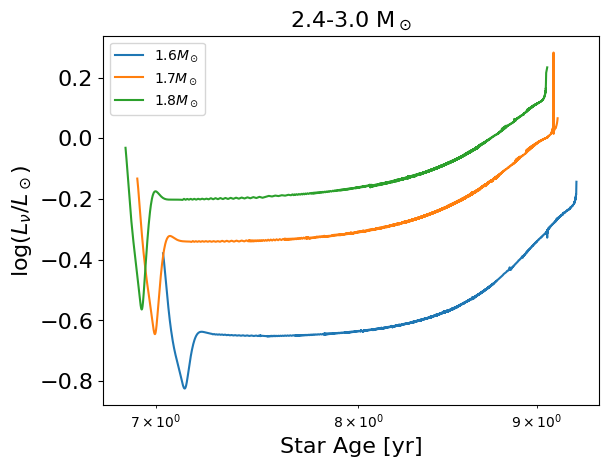

In [84]:
for a, l, label in zip(ages, lums, labels):
    plt.plot(a, l, label=rf"{label}$M_\odot$")
# plt.xscale("log")
plt.ylabel(r"$\log(L_\nu/L_\odot)$", fontsize=16)
plt.xlabel("Star Age [yr]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(r"2.4-3.0 M$_\odot$", fontsize=16)

plt.xscale("log")
plt.legend()

In [85]:
print(masses.shape)
print(ages.shape)
print(lums.shape)

(3,)
(3, 2629)
(3, 2629)


In [86]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)

model = LnR()
model.fit(np.array([masses]).T, output)

(3, 5258)


LinearRegression()

In [87]:
print(lums.shape)
print(lums1.shape)
print(masses.shape)

(3, 2629)
(4, 2629)
(3,)


(1, 5258)
(1, 5258)
(1, 5258)


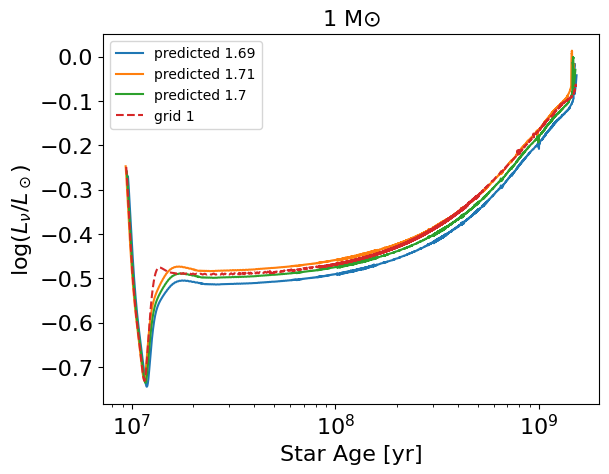

In [ ]:
# pred = 1.8
# prediction = model.predict([[masses[n]]])


prediction = model.predict([[pred - 0.01]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10 ** predicted_ages[0], predicted_lums[0], label=f"predicted {pred-0.01}")

prediction = model.predict([[pred + 0.01]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10 ** predicted_ages[0], predicted_lums[0], label=f"predicted {pred+0.01}")

prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10 ** predicted_ages[0], predicted_lums[0], label=f"predicted {pred}")

# plt.plot(ages[n], lums[n], label="real")
# plt.plot(ages[1], lums[1], label="grid")
# plt.plot(ages[2], lums[2], label="grid 0.4")
# plt.xscale("log")

# for i, label in enumerate(labels):
#     plt.plot(10 ** ages1[i], lums1[i], label=f"grid {label}")
plt.plot(10**ages1[[*labels].index(pred)], lums1[[*labels].index(pred)], label=f"grid {1.7}",linestyle='--')
plt.ylabel(r"$\log(L_\nu/L_\odot)$", fontsize=16)
plt.xlabel("Star Age [yr]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(r"1.7 M$\odot$", fontsize=16)
# plt.title(r'1.6-1.9 M$_\odot$',fontsize=16)

plt.xscale("log")
plt.legend()

-0.06715232885776612 -0.2859732459534961


(-1.285973245953496, 0.1)

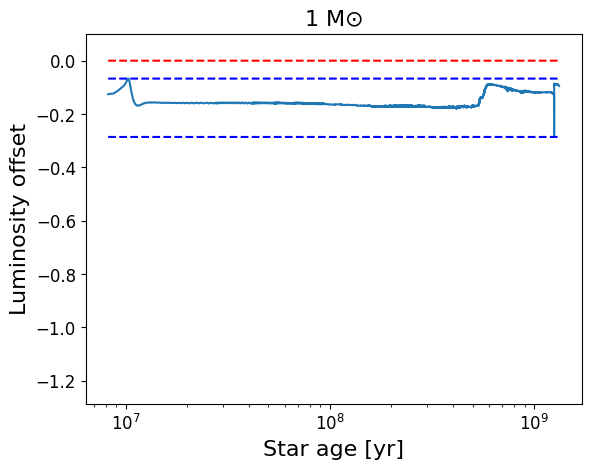

In [89]:
e = predicted_lums[0] - lums1[-2]
plt.plot(10 ** ages1[-2], e)
plt.ylabel("Luminosity offset", fontsize=16)
plt.xlabel("Star age [yr]", fontsize=16)
plt.ylim(-0.1, 0.1)
plt.xscale("log")
emax = max(e)
emin = min(e)
x = np.ones(len(predicted_ages[0]))
plt.plot(10 ** ages1[-2], x * emax, color="blue", linestyle="--")
plt.plot(10 ** ages1[-2], x * emin, color="blue", linestyle="--")
plt.plot(10 ** ages1[-2], x * 0, color="red", linestyle="--")
plt.title(r"1 M$\odot$", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print(emax, emin)
plt.ylim(emin - 1, 0.1)